In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cantonioupao/oxford-flower-17categories-labelled")

print("Path to dataset files:", path)

100%|██████████| 57.8M/57.8M [00:00<00:00, 185MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cantonioupao/oxford-flower-17categories-labelled/versions/1


In [ ]:
!ls $path

17FlowerOxfordDataset


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data, test_data =  image_dataset_from_directory(
    path + '/17FlowerOxfordDataset',
    subset='both',
    validation_split=0.3,
    seed=42
)

Found 1360 files belonging to 15 classes.
Using 952 files for training.
Using 408 files for validation.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential([
    Conv2D(25, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPool2D(2,2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(15, activation='softmax')
])

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_data, validation_data=test_data, epochs=1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1002 - loss: 978.2869 - val_accuracy: 0.1127 - val_loss: 2.7079


In [ ]:
images = []
labels = []

for image_batch, label_batch in test_data:
  images.extend(image_batch.numpy())
  labels.extend(label_batch.numpy())
  break

labels

[np.int32(5),
 np.int32(10),
 np.int32(2),
 np.int32(10),
 np.int32(2),
 np.int32(11),
 np.int32(14),
 np.int32(13),
 np.int32(1),
 np.int32(10),
 np.int32(0),
 np.int32(12),
 np.int32(3),
 np.int32(7),
 np.int32(1),
 np.int32(5),
 np.int32(13),
 np.int32(1),
 np.int32(0),
 np.int32(10),
 np.int32(13),
 np.int32(14),
 np.int32(8),
 np.int32(6),
 np.int32(5),
 np.int32(7),
 np.int32(2),
 np.int32(3),
 np.int32(12),
 np.int32(9),
 np.int32(2),
 np.int32(6)]

In [ ]:
image = images[0]
label = labels[0]

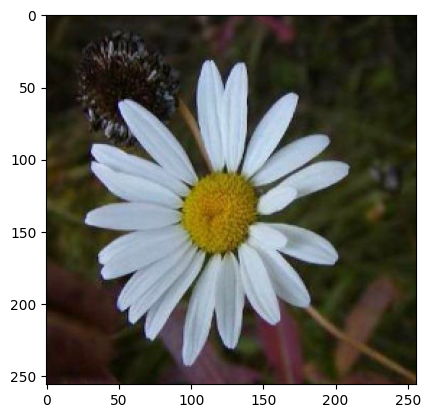

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

imageX = image / np.max(image)  # Normalize to 0-1 range

plt.imshow(imageX)
plt.show()

In [ ]:
preds = model.predict(np.expand_dims(image, axis=0)) # Change axis to 0 to add batch dimension correctly
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0.06643   , 0.06678447, 0.06685051, 0.06627659, 0.06724768,
        0.06672455, 0.06780951, 0.06687147, 0.06672835, 0.06616306,
        0.06616013, 0.06672218, 0.06613062, 0.06666443, 0.06643637]],
      dtype=float32)

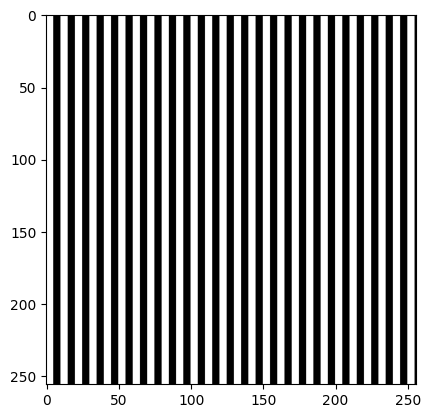

In [ ]:
something = np.zeros((256, 256, 3))
for i in range(0,256,10):
  something[:, i:i+5, :] = 255

plt.imshow(something / np.max(something))

In [ ]:
concept_activations = model.predict(np.expand_dims(something,axis=0))
concept_activations

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.06643   , 0.06678447, 0.06685051, 0.06627659, 0.06724768,
        0.06672455, 0.06780951, 0.06687147, 0.06672835, 0.06616306,
        0.06616013, 0.06672218, 0.06613062, 0.06666443, 0.06643637]],
      dtype=float32)

In [ ]:
X = np.concatenate([
    concept_activations,concept_activations])

y = np.array(
    [0,1]
)

y

array([0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

cav_flat = model.coef_


In [ ]:
np.mean(cav_flat).round()

np.float64(0.0)

## Deep SHAP

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Extract images and labels from train_data
images = []
labels = []
for image_batch, label_batch in train_data:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split using train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)  # Adjust test_size as needed

print("Train data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Train data shape: (761, 256, 256, 3) (761,)
Validation data shape: (191, 256, 256, 3) (191,)


In [ ]:
model.fit(X_train, y_train)

24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.0714 - loss: 1366.5372


In [ ]:
background = X_train[:100]

In [ ]:
import shap

In [ ]:
explainer = shap.DeepExplainer(model, background)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 256, 256, 3))']
  warnings.warn(msg)


In [ ]:
shapely_values = explainer(X_val[:3])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 256, 256, 3))']
  warnings.warn(msg)


In [ ]:
shap.image_plot(shapely_values, X_val[:3])